In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import image
%matplotlib inline

import glob
import pathlib

import tensorflow as tf
import tensorflow as keras 
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense

In [2]:
img = pathlib.Path('D:\Work - Data\Projects\Red Blood Cells\Images\Mendeley_Data_Barcelona')

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard
from sklearn.metrics import confusion_matrix
import numpy as np

# set up the data generators
train_dir = 'D:\Work - Data\Projects\Red Blood Cells\Images\Mendeley_Data_Barcelona'
validation_dir = 'D:\Work - Data\Projects\Red Blood Cells\Images\Mendeley_Data_Barcelona'
test_dir = 'D:\Work - Data\Projects\Red Blood Cells\Images\Tests'
img_height = 360
img_width = 360
batch_size = 32

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(train_dir, target_size=(img_height, img_width), batch_size=batch_size, class_mode='categorical')
validation_data = test_datagen.flow_from_directory(validation_dir, target_size=(img_height, img_width), batch_size=batch_size, class_mode='categorical')
test_data = test_datagen.flow_from_directory(test_dir, target_size=(img_height, img_width), batch_size=batch_size, class_mode='categorical')

# create the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(8, activation='softmax')
])

# compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Found 15793 images belonging to 8 classes.
Found 15793 images belonging to 8 classes.
Found 0 images belonging to 0 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 358, 358, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 179, 179, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 177, 177, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 88, 88, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 86, 86, 128)       73856   

Epoch 1/15
494/494 [==============================] - 1349s 3s/step - loss: 1.2678 - accuracy: 0.5147 - val_loss: 0.7556 - val_accuracy: 0.7222
Epoch 2/15
494/494 [==============================] - 2520s 5s/step - loss: 0.7554 - accuracy: 0.7189 - val_loss: 0.4526 - val_accuracy: 0.8338
Epoch 3/15
494/494 [==============================] - 5077s 10s/step - loss: 0.5551 - accuracy: 0.7918 - val_loss: 0.2972 - val_accuracy: 0.8825
Epoch 4/15
494/494 [==============================] - 3655s 7s/step - loss: 0.4352 - accuracy: 0.8397 - val_loss: 0.2970 - val_accuracy: 0.8817
Epoch 5/15
494/494 [==============================] - 2660s 5s/step - loss: 0.3886 - accuracy: 0.8595 - val_loss: 0.1882 - val_accuracy: 0.9404
Epoch 6/15
494/494 [==============================] - 2832s 6s/step - loss: 0.3411 - accuracy: 0.8797 - val_loss: 0.1405 - val_accuracy: 0.9537
Epoch 7/15
494/494 [==============================] - 2905s 6s/step - loss: 0.2867 - accuracy: 0.8997 - val_loss: 0.1785 - val_accuracy

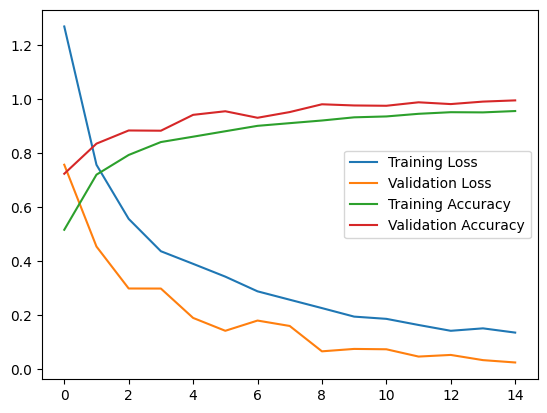

In [7]:

# define callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)
model_checkpoint = ModelCheckpoint(filepath='model_{epoch:02d}.h5', monitor='val_loss', save_best_only=False)
tensorboard = TensorBoard(log_dir='./logs')

# train the model
history = model.fit(train_data,
                    epochs=15,
                    validation_data=validation_data,
                    callbacks=[early_stop, model_checkpoint, tensorboard])

# plot the loss and accuracy curves
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

## interruption au milieu du 13 ème epoch, meilleure accuracy 
Found 15793 images belonging to 8 classes.
Found 15793 images belonging to 8 classes.
Found 0 images belonging to 0 classes.
Epoch 1/15
494/494 [==============================] - 1299s 3s/step - loss: 1.3185 - accuracy: 0.5223 - val_loss: 0.7608 - val_accuracy: 0.7080
Epoch 2/15
494/494 [==============================] - 1306s 3s/step - loss: 0.6906 - accuracy: 0.7429 - val_loss: 0.3962 - val_accuracy: 0.8629
Epoch 3/15
494/494 [==============================] - 1254s 3s/step - loss: 0.5111 - accuracy: 0.8191 - val_loss: 0.3053 - val_accuracy: 0.8894
Epoch 4/15
494/494 [==============================] - 1267s 3s/step - loss: 0.4062 - accuracy: 0.8534 - val_loss: 0.1993 - val_accuracy: 0.9336
Epoch 5/15
494/494 [==============================] - 1262s 3s/step - loss: 0.3497 - accuracy: 0.8749 - val_loss: 0.1904 - val_accuracy: 0.9329
Epoch 6/15
494/494 [==============================] - 1222s 2s/step - loss: 0.3044 - accuracy: 0.8945 - val_loss: 0.1318 - val_accuracy: 0.9573
Epoch 7/15
494/494 [==============================] - 1217s 2s/step - loss: 0.2735 - accuracy: 0.9038 - val_loss: 0.1235 - val_accuracy: 0.9592
Epoch 8/15
494/494 [==============================] - 1206s 2s/step - loss: 0.2332 - accuracy: 0.9196 - val_loss: 0.0943 - val_accuracy: 0.9639
Epoch 9/15
494/494 [==============================] - 1199s 2s/step - loss: 0.2222 - accuracy: 0.9208 - val_loss: 0.0765 - val_accuracy: 0.9764
Epoch 10/15
494/494 [==============================] - 1134s 2s/step - loss: 0.1770 - accuracy: 0.9382 - val_loss: 0.0623 - val_accuracy: 0.9806
Epoch 11/15
494/494 [==============================] - 1124s 2s/step - loss: 0.1795 - accuracy: 0.9348 - val_loss: 0.0824 - val_accuracy: 0.9719
Epoch 12/15
494/494 [==============================] - 1122s 2s/step - loss: 0.1501 - accuracy: 0.9478 - val_loss: 0.0444 - val_accuracy: 0.9847
Epoch 13/15
281/494 [================>.............] - ETA: 6:21 - loss: 0.1391 - accuracy: 0.9502

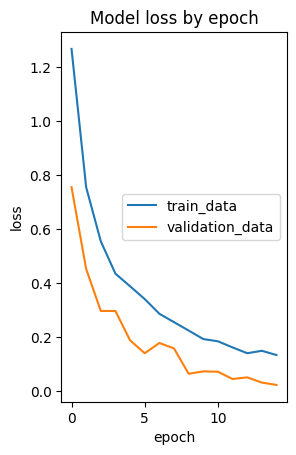

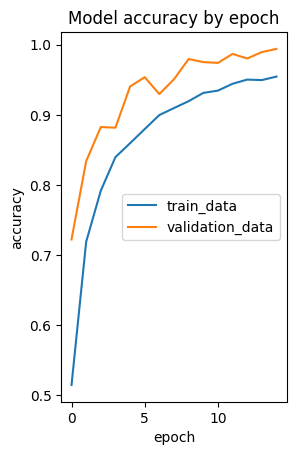

In [8]:
plt.subplot(1,2,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss by epoch')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_data', 'validation_data'], loc='right')
plt.show();

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy by epoch')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_data', 'validation_data'], loc='right')
plt.show();

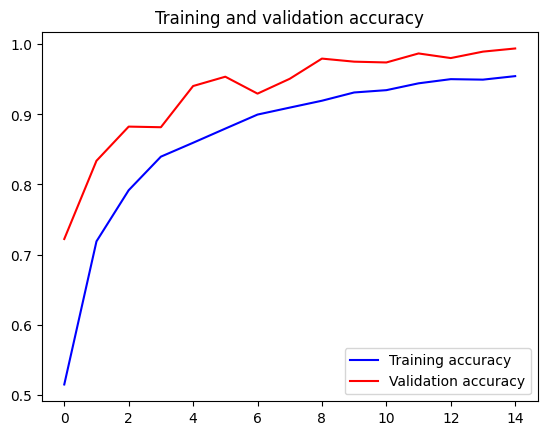

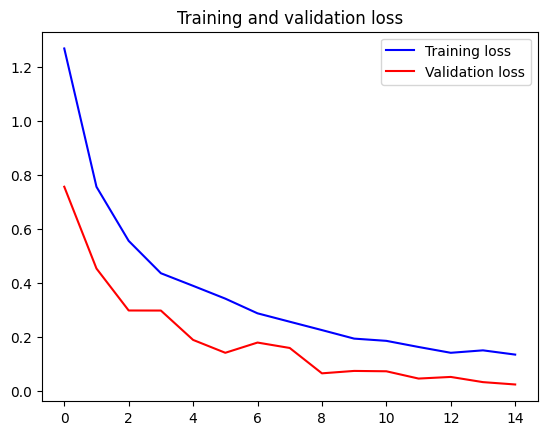

In [10]:
# retrieve metrics and plot accuracy and loss vs number of epochs

import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

# plot accuracy
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.savefig('accuracy.png')
plt.show()

# plot loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.savefig('loss.png')
plt.show()


In [17]:
pip install tqdm

                                              0.0/77.1 kB ? eta -:--:--
     -----                                    10.2/77.1 kB ? eta -:--:--
     --------------------                   41.0/77.1 kB 196.9 kB/s eta 0:00:01
     -------------------------------------- 77.1/77.1 kB 329.3 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [39]:
import os
from PIL import Image
from tqdm import tqdm

# Set up directories and parameters
data_dir = 'D:\Work - Data\Projects\Red Blood Cells\Images\Tests'
img_height = 360
img_width = 360

# Resize images in data_dir
for class_dir in os.listdir(data_dir):
    full_class_dir = os.path.join(data_dir, class_dir)
    if os.path.isdir(full_class_dir):
        for img_file in tqdm(os.listdir(full_class_dir)):
            if img_file.startswith('resized_'):
                continue
            try:
                img_path = os.path.join(full_class_dir, img_file)
                img = Image.open(img_path)
                img = img.resize((img_height, img_width))
                new_file_name = "resized_" + img_file
                new_img_path = os.path.join(full_class_dir, new_file_name)
                img.save(new_img_path)
            except (OSError, IOError):
                print(f"Unsupported file: {img_file}")

# Set up test data generator
test_datagen = ImageDataGenerator(rescale=1./255)

## Load resized test images into generator
#test_data = test_datagen.flow_from_directory(
#    data_dir,
#    target_size=(img_height, img_width),
#    batch_size=batch_size,
#    class_mode='categorical',
#    shuffle=False,
#    subset='none',
#)

test_data = test_datagen.flow_from_directory(
    directory=test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False)

100%|██████████| 3/3 [00:00<?, ?it/s]


Found 61 images belonging to 8 classes.


In [32]:
from tensorflow import keras

# Load the saved model
model = keras.models.load_model('D:\Work - Data\Projects/Red Blood Cells\model_15.h5')

new_data=test_data

# Use the model for prediction
predictions = model.predict(new_data)

2/2 [==============================] - 3s 1s/step


In [33]:

# evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_data)
print("Test accuracy:", test_acc)


2/2 [==============================] - 3s 993ms/step - loss: 32.8229 - accuracy: 0.1639
Test accuracy: 0.16393442451953888


In [40]:
class_names = list(test_data.class_indices.keys())
print(class_names)

['Basophil', 'Eosinophil', 'Erythroblast', 'Monocyte', 'ig', 'lymphocyte', 'neutrophil', 'platelet']


In [45]:
print(model.input_shape)

(None, 360, 360, 3)


In [50]:
print(new_data[0][0].shape)
len(new_data)

(32, 360, 360, 3)


2

In [51]:
print(test_data[0][0].shape)
len(test_data)

(32, 360, 360, 3)


2

Test sur un échantillon de 31 images piochées sur internet
https://www.histology-world.com/photoalbum/displayimage.php?album=65&pid=3479#top_display_media
https://www.poja-collection-microscopic-anatomy.com/11---poja-l705.html


In [73]:
model_path='D:\Work - Data\Projects/Red Blood Cells\model_15.h5'
test_dir= 'D:\Work - Data\Projects\Red Blood Cells\Images\Tests\Random_pick'
data_dir = 'D:\Work - Data\Projects\Red Blood Cells\Images\Tests'

In [75]:
import os
from PIL import Image
from tqdm import tqdm

# Set up directories and parameters

img_height = 360
img_width = 360

# Resize images in data_dir
for class_dir in os.listdir(data_dir):
    full_class_dir = os.path.join(data_dir, class_dir)
    if os.path.isdir(full_class_dir):
        for img_file in tqdm(os.listdir(full_class_dir)):
            if img_file.startswith('resized_'):
                # delete files with more than one occurrence of 'resized_' as prefix
                if img_file.count('resized_') > 1:
                    os.remove(os.path.join(full_class_dir, img_file))
                continue
            try:
                img_path = os.path.join(full_class_dir, img_file)
                img = Image.open(img_path)
                img = img.resize((img_height, img_width))
                new_file_name = "resized_" + img_file
                new_img_path = os.path.join(full_class_dir, new_file_name)
                img.save(new_img_path)
                # delete original file after resizing
                os.remove(img_path)
            except (OSError, IOError):
                print(f"Unsupported file: {img_file}")

# Set up test data generator
test_datagen = ImageDataGenerator(rescale=1./255)

test_data = test_datagen.flow_from_directory(
    directory=test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False)

100%|██████████| 8/8 [00:00<00:00, 4001.24it/s]


Unsupported file: Basophil
Unsupported file: Eosinophil
Unsupported file: Erythroblast
Unsupported file: ig
Unsupported file: lymphocyte
Unsupported file: Monocyte
Unsupported file: neutrophil
Unsupported file: platelet


100%|██████████| 8/8 [00:00<00:00, 4001.24it/s]


Unsupported file: Basophil
Unsupported file: Eosinophil
Unsupported file: Erythroblast
Unsupported file: ig
Unsupported file: Lymphocyte
Unsupported file: Monocyte
Unsupported file: Neutrophil
Unsupported file: platelet
Found 61 images belonging to 8 classes.


In [76]:
# Load the saved model
model = keras.models.load_model(model_path)

test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(360, 360),
                                             batch_size=32,
                                             class_mode='categorical')

loss, accuracy = model.evaluate(test_data)
print(f"Test loss: {loss:.4f}")
print(f"Test accuracy: {accuracy:.4f}")

Found 61 images belonging to 8 classes.
2/2 [==============================] - 3s 976ms/step - loss: 32.8229 - accuracy: 0.1639
Test loss: 32.8229
Test accuracy: 0.1639


In [77]:
from sklearn.metrics import classification_report

# load the model and test data
model = keras.models.load_model(model_path)
test_data = ImageDataGenerator().flow_from_directory(test_dir, target_size=(360,360), batch_size=32)

# predict the labels for the test data
y_pred = model.predict(test_data)

# convert the predicted probabilities to class labels
y_pred = np.argmax(y_pred, axis=1)

# get the true labels
y_true = test_data.classes

# get the class names
class_names = list(test_data.class_indices.keys())

# get the classification report
report = classification_report(y_true, y_pred, target_names=class_names)

# print the report
print(report)

#This will output a classification report with the accuracy, precision, recall, and F1 score for each class.


Found 61 images belonging to 8 classes.
2/2 [==============================] - 3s 990ms/step
              precision    recall  f1-score   support

    Basophil       0.00      0.00      0.00         5
  Eosinophil       0.25      0.14      0.18         7
Erythroblast       0.00      0.00      0.00         4
    Monocyte       0.06      0.12      0.08         8
          ig       0.00      0.00      0.00         5
  lymphocyte       0.00      0.00      0.00        15
  neutrophil       0.11      0.07      0.09        14
    platelet       0.00      0.00      0.00         3

    accuracy                           0.05        61
   macro avg       0.05      0.04      0.04        61
weighted avg       0.06      0.05      0.05        61



## Test sur échantillons correspondant au test A du Raabin-WBC dataset (5 classes, hors platelet, ig, erythroblast) https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8782871/

In [81]:
model_path='D:\Work - Data\Projects/Red Blood Cells\model_15.h5'
test_dir= 'D:\Work - Data\Projects\Red Blood Cells\Images\Tests\TestA'
data_dir = 'D:\Work - Data\Projects\Red Blood Cells\Images\Tests\TestA'

In [82]:
import os
from PIL import Image
from tqdm import tqdm

# Set up directories and parameters

img_height = 360
img_width = 360

# Resize images in data_dir
for class_dir in os.listdir(data_dir):
    full_class_dir = os.path.join(data_dir, class_dir)
    if os.path.isdir(full_class_dir):
        for img_file in tqdm(os.listdir(full_class_dir)):
            if img_file.startswith('resized_'):
                # delete files with more than one occurrence of 'resized_' as prefix
                if img_file.count('resized_') > 1:
                    os.remove(os.path.join(full_class_dir, img_file))
                continue
            try:
                img_path = os.path.join(full_class_dir, img_file)
                img = Image.open(img_path)
                img = img.resize((img_height, img_width))
                new_file_name = "resized_" + img_file
                new_img_path = os.path.join(full_class_dir, new_file_name)
                img.save(new_img_path)
                # delete original file after resizing
                os.remove(img_path)
            except (OSError, IOError):
                print(f"Unsupported file: {img_file}")

# Set up test data generator
test_datagen = ImageDataGenerator(rescale=1./255)


100%|██████████| 3/3 [00:00<?, ?it/s]


In [83]:
# Load the saved model
model = keras.models.load_model(model_path)

test_datagen = ImageDataGenerator(rescale=1./255)
test_data_1 = test_datagen.flow_from_directory(test_dir,
                                             target_size=(360, 360),
                                             batch_size=32,
                                             class_mode='categorical')

loss, accuracy = model.evaluate(test_data_1)
print(f"Test loss: {loss:.4f}")
print(f"Test accuracy: {accuracy:.4f}")

Found 4350 images belonging to 8 classes.
136/136 [==============================] - 154s 1s/step - loss: 38.8984 - accuracy: 0.0839
Test loss: 38.8984
Test accuracy: 0.0839


In [84]:
from sklearn.metrics import classification_report

# load the model and test data
#model = keras.models.load_model(model_path)
#test_data_1 = ImageDataGenerator().flow_from_directory(test_dir, target_size=(360,360), batch_size=32)

# predict the labels for the test data
y_pred = model.predict(test_data_1)

# convert the predicted probabilities to class labels
y_pred = np.argmax(y_pred, axis=1)

# get the true labels
y_true = test_data_1.classes

# get the class names
class_names = list(test_data_1.class_indices.keys())

# get the classification report
report = classification_report(y_true, y_pred, target_names=class_names)

# print the report
print(report)

#This will output a classification report with the accuracy, precision, recall, and F1 score for each class.


136/136 [==============================] - 157s 1s/step
              precision    recall  f1-score   support

    Basophil       0.01      0.01      0.01        89
  Eosinophil       0.08      0.86      0.14       322
Erythroblast       0.00      0.00      0.00         4
  Lymphocyte       0.43      0.02      0.03      1034
    Monocyte       0.06      0.04      0.05       234
  Neutrophil       0.71      0.00      0.00      2660
          ig       0.00      0.00      0.00         4
    platelet       0.00      0.00      0.00         3

    accuracy                           0.07      4350
   macro avg       0.16      0.12      0.03      4350
weighted avg       0.55      0.07      0.02      4350



d:\App_Data\Anaconda\envs\Python20\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\App_Data\Anaconda\envs\Python20\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\App_Data\Anaconda\envs\Python20\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


for memory
136/136 [==============================] - 141s 1s/step
              precision    recall  f1-score   support

    Basophil       0.01      0.01      0.01        89
  Eosinophil       0.08      0.86      0.14       322
Erythroblast       0.00      0.00      0.00         4
  Lymphocyte       0.33      0.01      0.03      1034
    Monocyte       0.07      0.05      0.06       234
  Neutrophil       0.71      0.00      0.00      2660
          ig       0.00      0.00      0.00         4
    platelet       0.00      0.00      0.00         3

    accuracy                           0.07      4350
   macro avg       0.15      0.12      0.03      4350
weighted avg       0.53      0.07      0.02      4350

In [86]:
model_path='D:\Work - Data\Projects/Red Blood Cells\model_15.h5'
test_dir= 'D:\Work - Data\Projects\Red Blood Cells\Images\Tests\Mendeley_extract'
data_dir = 'D:\Work - Data\Projects\Red Blood Cells\Images\Tests\Mendeley_extract'

In [87]:
import os
from PIL import Image
from tqdm import tqdm

# Set up directories and parameters

img_height = 360
img_width = 360

# Resize images in data_dir
for class_dir in os.listdir(data_dir):
    full_class_dir = os.path.join(data_dir, class_dir)
    if os.path.isdir(full_class_dir):
        for img_file in tqdm(os.listdir(full_class_dir)):
            if img_file.startswith('resized_'):
                # delete files with more than one occurrence of 'resized_' as prefix
                if img_file.count('resized_') > 1:
                    os.remove(os.path.join(full_class_dir, img_file))
                continue
            try:
                img_path = os.path.join(full_class_dir, img_file)
                img = Image.open(img_path)
                img = img.resize((img_height, img_width))
                new_file_name = "resized_" + img_file
                new_img_path = os.path.join(full_class_dir, new_file_name)
                img.save(new_img_path)
                # delete original file after resizing
                os.remove(img_path)
            except (OSError, IOError):
                print(f"Unsupported file: {img_file}")

# Set up test data generator
test_datagen = ImageDataGenerator(rescale=1./255)


100%|██████████| 48/48 [00:01<00:00, 29.65it/s]


In [88]:
# Load the saved model
model = keras.models.load_model(model_path)

test_datagen = ImageDataGenerator(rescale=1./255)
test_data_2 = test_datagen.flow_from_directory(test_dir,
                                             target_size=(360, 360),
                                             batch_size=32,
                                             class_mode='categorical')

loss, accuracy = model.evaluate(test_data_2)
print(f"Test loss: {loss:.4f}")
print(f"Test accuracy: {accuracy:.4f}")

Found 291 images belonging to 8 classes.
10/10 [==============================] - 16s 2s/step - loss: 0.0289 - accuracy: 0.9931
Test loss: 0.0289
Test accuracy: 0.9931


In [89]:
from sklearn.metrics import classification_report

# load the model and test data
#model = keras.models.load_model(model_path)
#test_data_1 = ImageDataGenerator().flow_from_directory(test_dir, target_size=(360,360), batch_size=32)

# predict the labels for the test data
y_pred = model.predict(test_data_2)

# convert the predicted probabilities to class labels
y_pred = np.argmax(y_pred, axis=1)

# get the true labels
y_true = test_data_2.classes

# get the class names
class_names = list(test_data_2.class_indices.keys())

# get the classification report
report = classification_report(y_true, y_pred, target_names=class_names)

# print the report
print(report)

#This will output a classification report with the accuracy, precision, recall, and F1 score for each class.


10/10 [==============================] - 11s 1s/step
              precision    recall  f1-score   support

    basophil       0.00      0.00      0.00        24
  eosinophil       0.00      0.00      0.00        11
erythroblast       0.21      0.21      0.21        48
          ig       0.19      0.20      0.20        40
  lymphocyte       0.03      0.03      0.03        40
    monocyte       0.13      0.12      0.13        40
  neutrophil       0.18      0.17      0.18        40
    platelet       0.15      0.15      0.15        48

    accuracy                           0.13       291
   macro avg       0.11      0.11      0.11       291
weighted avg       0.13      0.13      0.13       291



In [85]:
test_url = "http://lecannabiculteur.free.fr/SITES/UNIV%20CATHO%20LOUVAIN/istogene/safe/images/08910140.jpg"
test_path = tf.keras.utils.get_file('08910140', origin=test_url)

img = tf.keras.utils.load_img(
    test_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score)))

1/1 [==============================] - 0s 415ms/step
This image most likely belongs to Eosinophil with a 27.97 percent confidence.
